In [1]:
# !pip install sentence_transformers

In [2]:
from sentence_transformers import SentenceTransformer, util
from PIL import Image
import glob
import torch
import pickle
import zipfile
from IPython.display import display
from IPython.display import Image as IPImage
import os
from tqdm.autonotebook import tqdm

#First, we load the CLIP model
model = SentenceTransformer('clip-ViT-B-32')

C:\anaconda\envs\tensorflow_env\lib\site-packages\torchvision\transforms\transforms.py:281: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "


In [3]:
# Get about 5k images from Unsplash 
img_folder = 'photos/'
if not os.path.exists(img_folder) or len(os.listdir(img_folder)) == 0:
    os.makedirs(img_folder, exist_ok=True)
    
    photo_filename = 'unsplash-25k-photos.zip'
    if not os.path.exists(photo_filename):   #Download dataset if does not exist
        util.http_get('http://sbert.net/datasets/'+photo_filename, photo_filename)
        
#     #Extract all images
#     with zipfile.ZipFile(photo_filename, 'r') as zf:
#         for member in tqdm(zf.infolist(), desc='Extracting'):
#             zf.extract(member, img_folder)

In [4]:
# Compute the embeddings
img_names = list(glob.glob('photos/*.jpg'))
print("Images:", len(img_names))
img_emb = model.encode([Image.open(filepath) for filepath in img_names], batch_size=128, convert_to_tensor=True, show_progress_bar=True)

Images: 5200


Batches:   0%|          | 0/41 [00:00<?, ?it/s]

In [5]:
# Run the clustering algorithm
duplicates = util.paraphrase_mining_embeddings(img_emb)

In [6]:
# Each duplicates in format (score, image_id1, image_id2) and is scorted in decreasing order
duplicates

[[1.0000005960464478, 2709, 3913],
 [1.0000003576278687, 406, 474],
 [1.0000003576278687, 1959, 3574],
 [0.9943234920501709, 436, 4389],
 [0.9837164878845215, 4138, 4742],
 [0.9828776121139526, 1536, 1683],
 [0.9804171323776245, 3106, 5069],
 [0.9802991151809692, 747, 2102],
 [0.9791088104248047, 3928, 4534],
 [0.9773831367492676, 570, 4583],
 [0.9770416021347046, 3307, 3372],
 [0.9767309427261353, 819, 1305],
 [0.9767166376113892, 1719, 3664],
 [0.9760162830352783, 529, 2476],
 [0.9747175574302673, 1719, 4427],
 [0.9743106365203857, 963, 2091],
 [0.9743095636367798, 2213, 3444],
 [0.9742107391357422, 1567, 3630],
 [0.9737048745155334, 920, 1575],
 [0.9736678600311279, 529, 1382],
 [0.9733541011810303, 77, 1490],
 [0.9730954766273499, 3292, 4667],
 [0.9729828834533691, 385, 2270],
 [0.972762942314148, 1044, 4095],
 [0.9722371101379395, 1957, 2826],
 [0.9719149470329285, 464, 4667],
 [0.9717671275138855, 920, 4605],
 [0.9713842868804932, 1394, 2399],
 [0.9710878729820251, 2758, 4667],
 


Score: 1.000
photos\6WTdElLZn2o.jpg


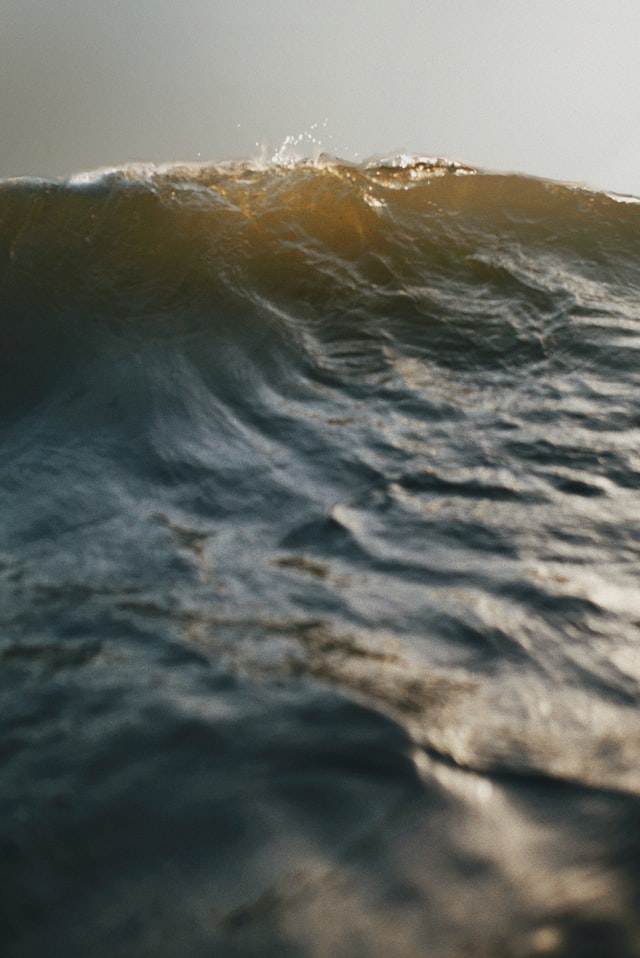

photos\9yePA1fgnVE.jpg


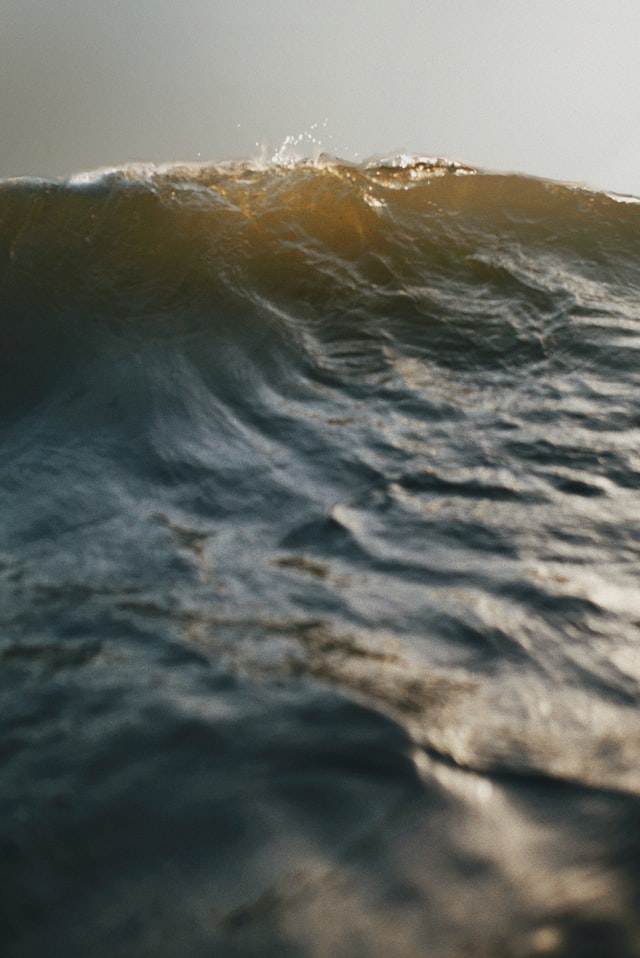


Score: 1.000
photos\0UtMDLOk0Vg.jpg


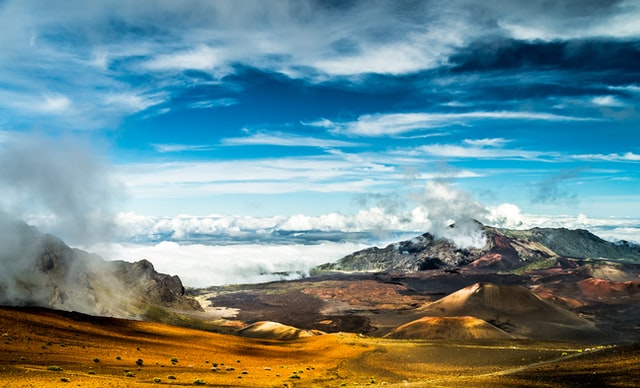

photos\10OY7Od4YeQ.jpg


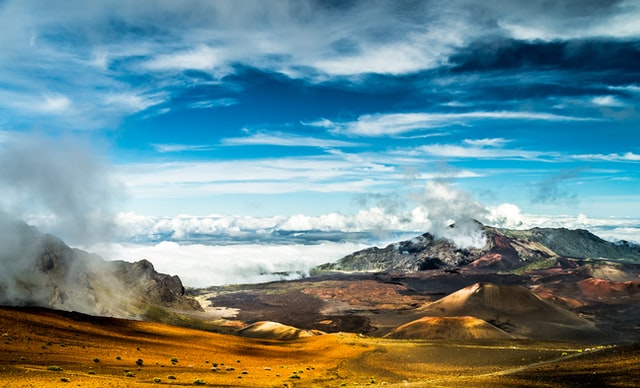


Score: 1.000
photos\4Y2xR3sxo7E.jpg


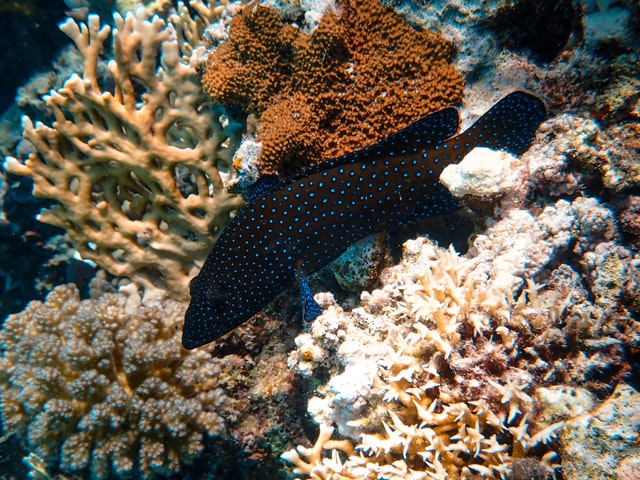

photos\91DU3oXyy4k.jpg


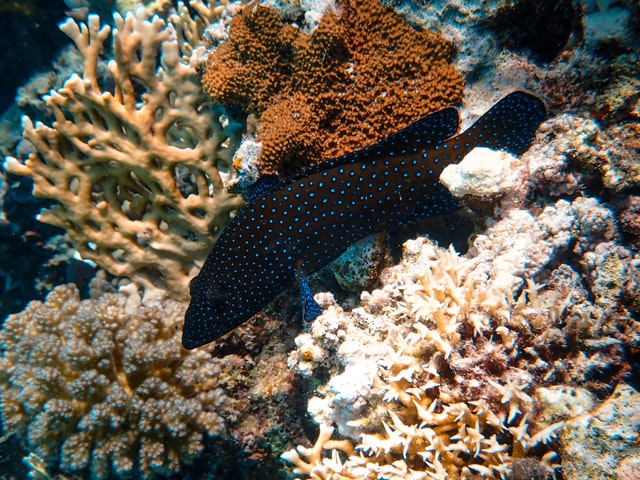


Score: 0.994
photos\0y2O5rLgi1w.jpg


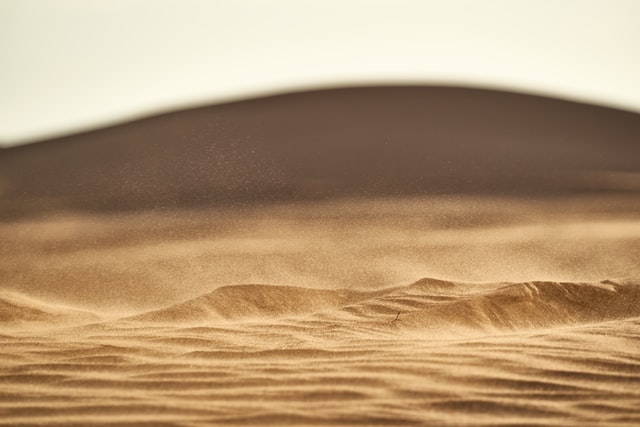

photos\ANICl9V7BUA.jpg


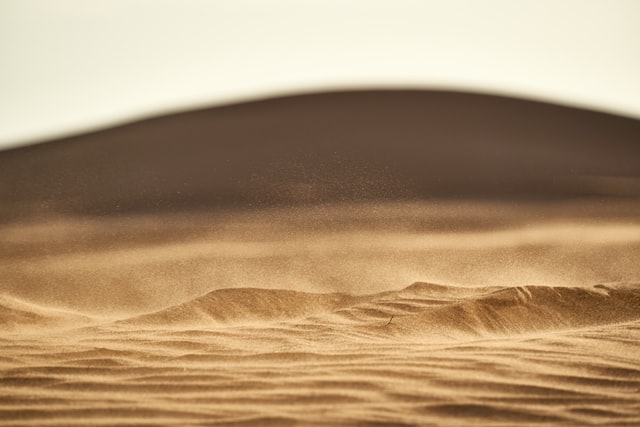


Score: 0.984
photos\ad91jz_dFpc.jpg


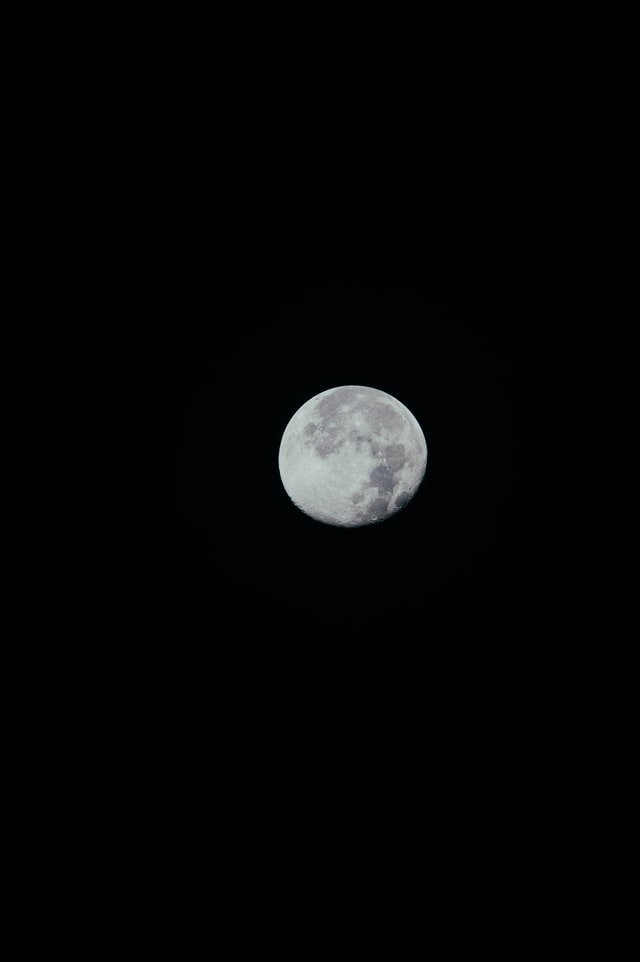

photos\b2Q8xCmcsvk.jpg


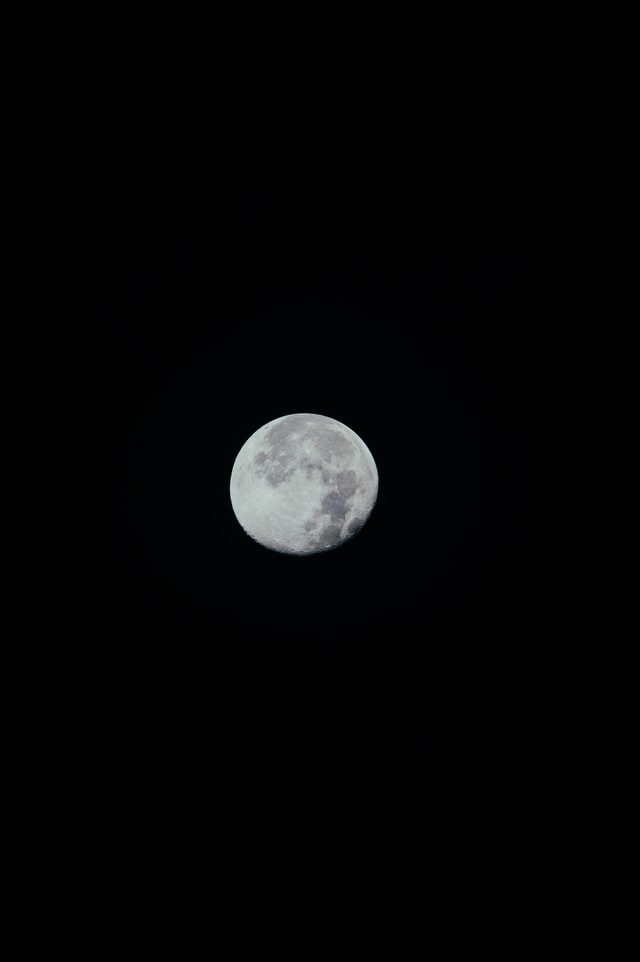


Score: 0.983
photos\3tHeNvZkdco.jpg


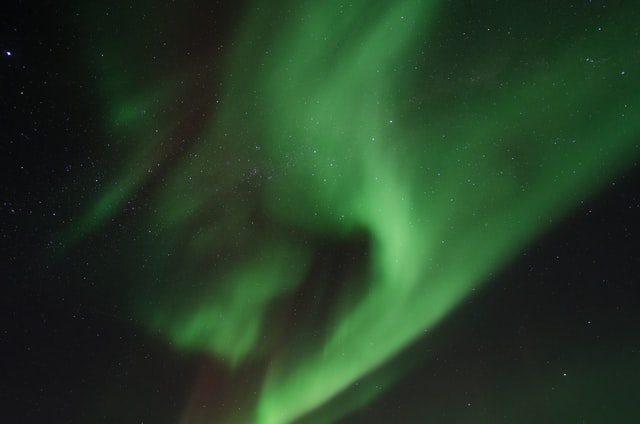

photos\4aphqBYyZsA.jpg


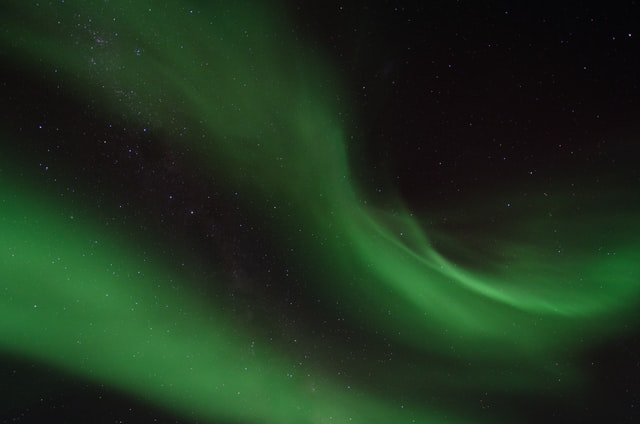


Score: 0.980
photos\7wFSaj-k-uQ.jpg


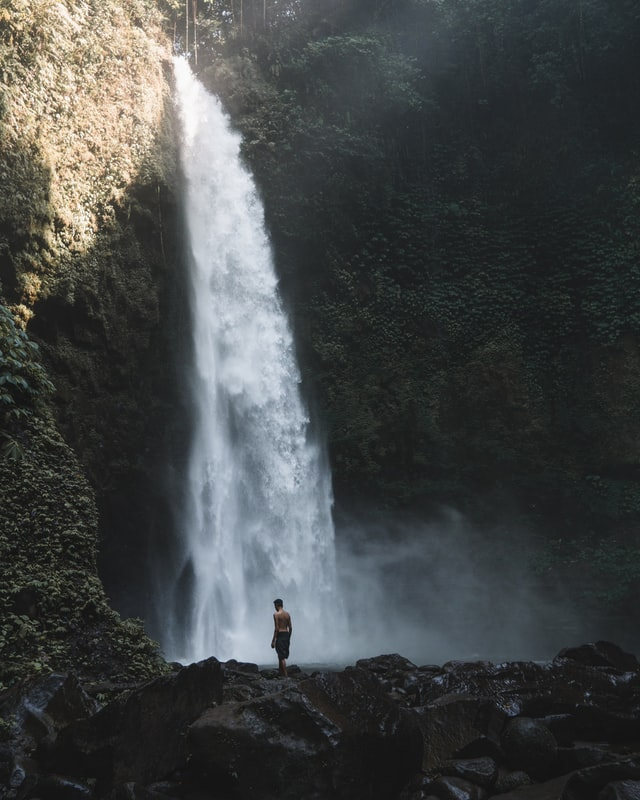

photos\_oRt0kO6W-s.jpg


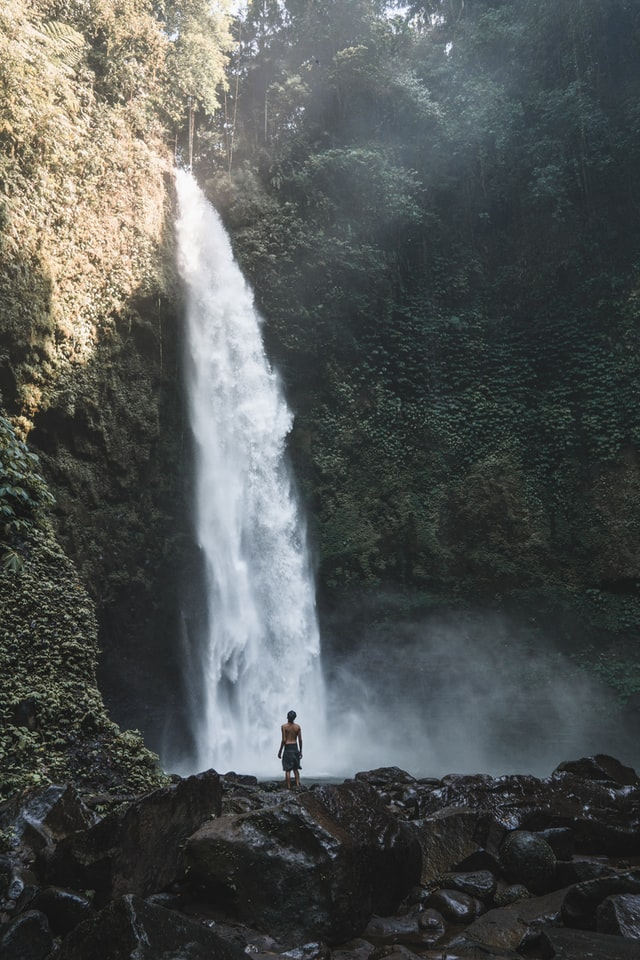


Score: 0.980
photos\1T6IoZ9ZmQ8.jpg


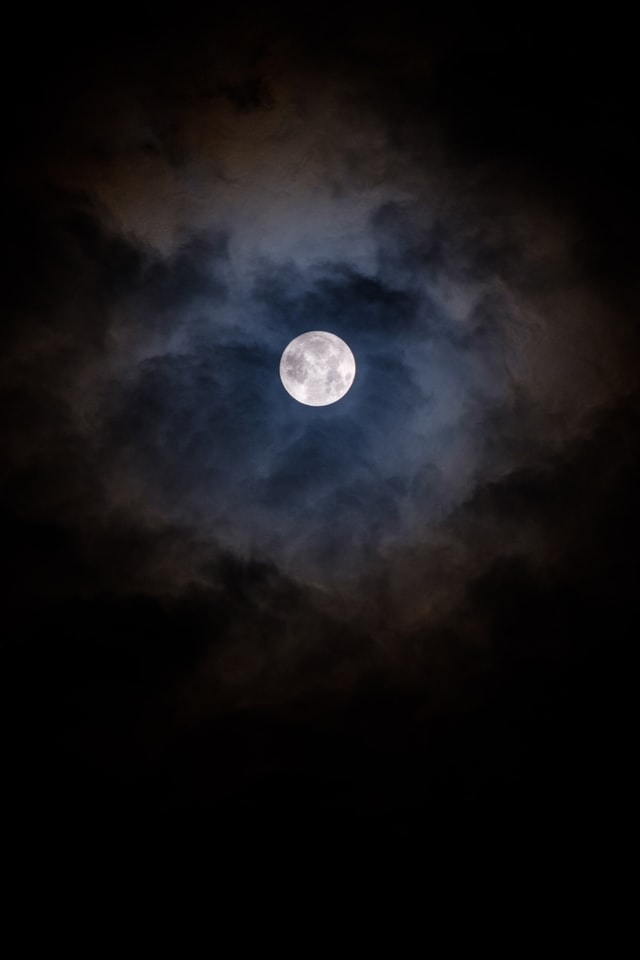

photos\5D_xJ1MJg6A.jpg


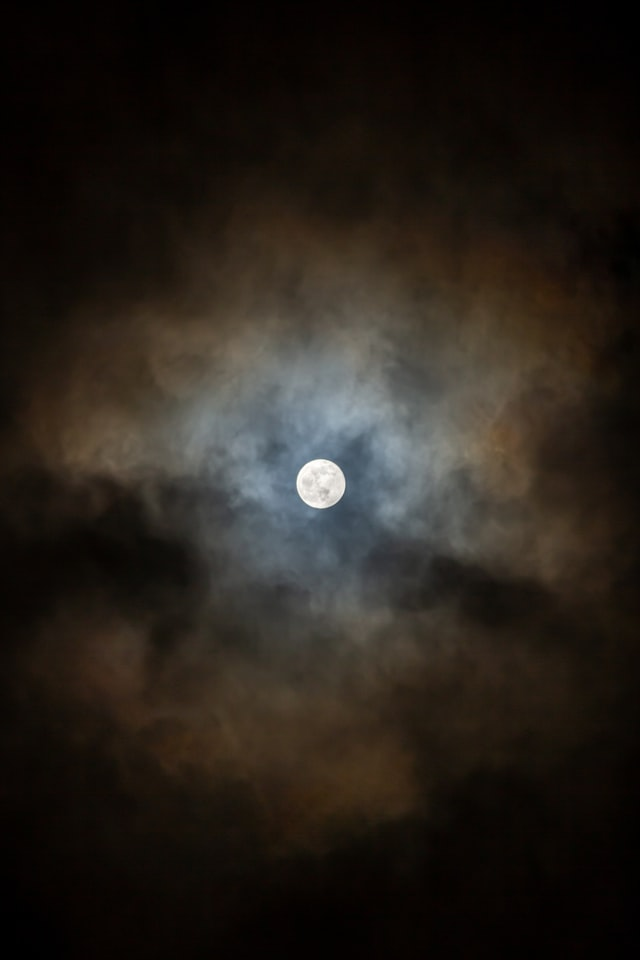


Score: 0.979
photos\9zhsq3o1k60.jpg


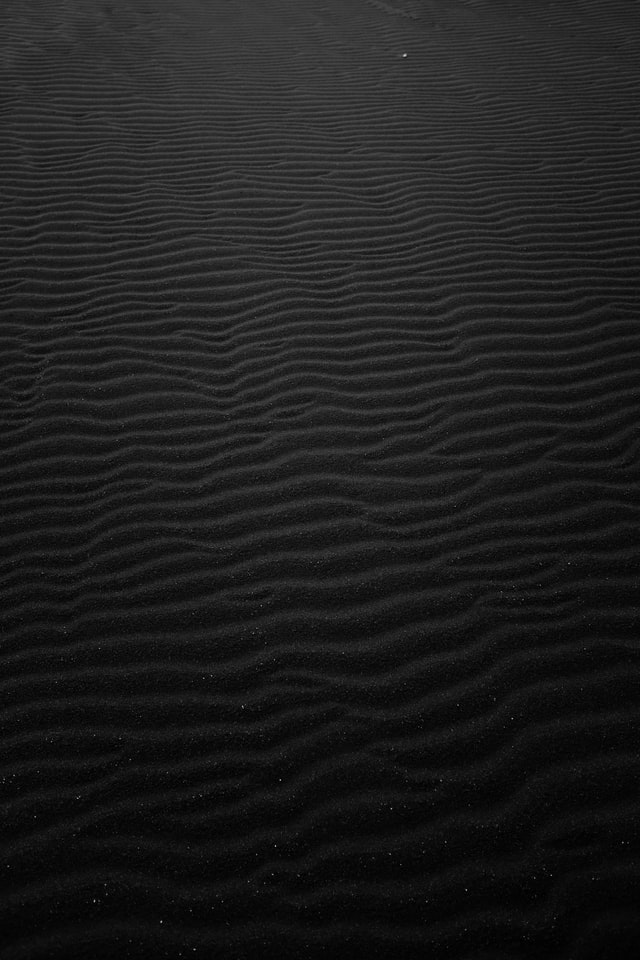

photos\AswhiuXqHLw.jpg


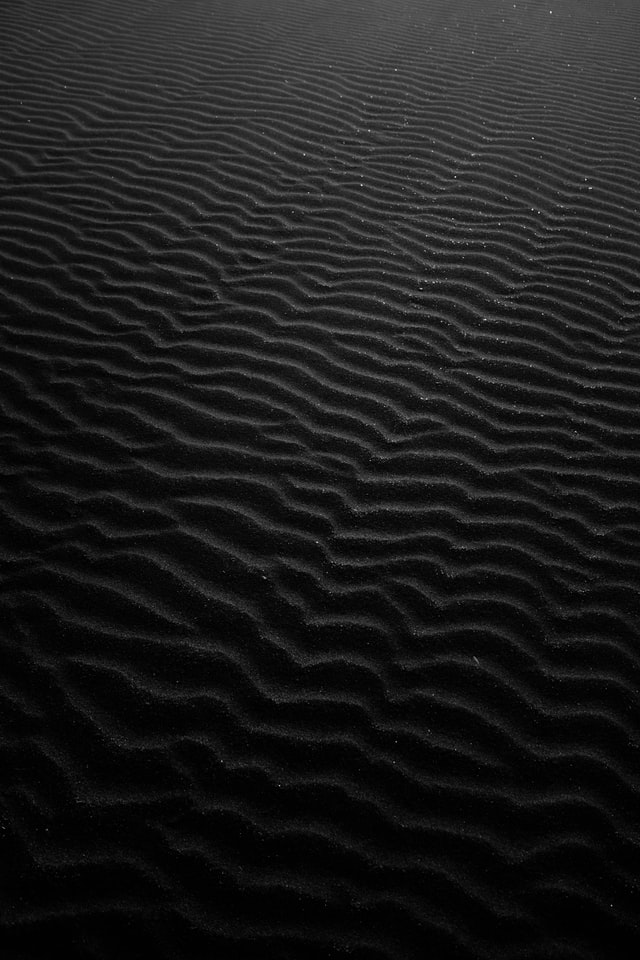


Score: 0.977
photos\1Crk-7TX198.jpg


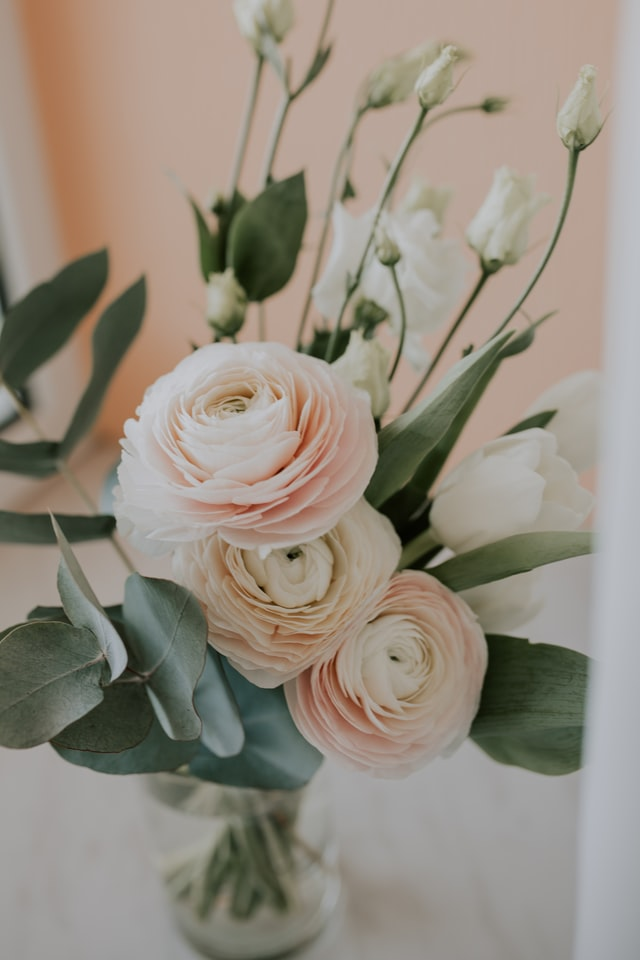

photos\AV63YZlP9ao.jpg


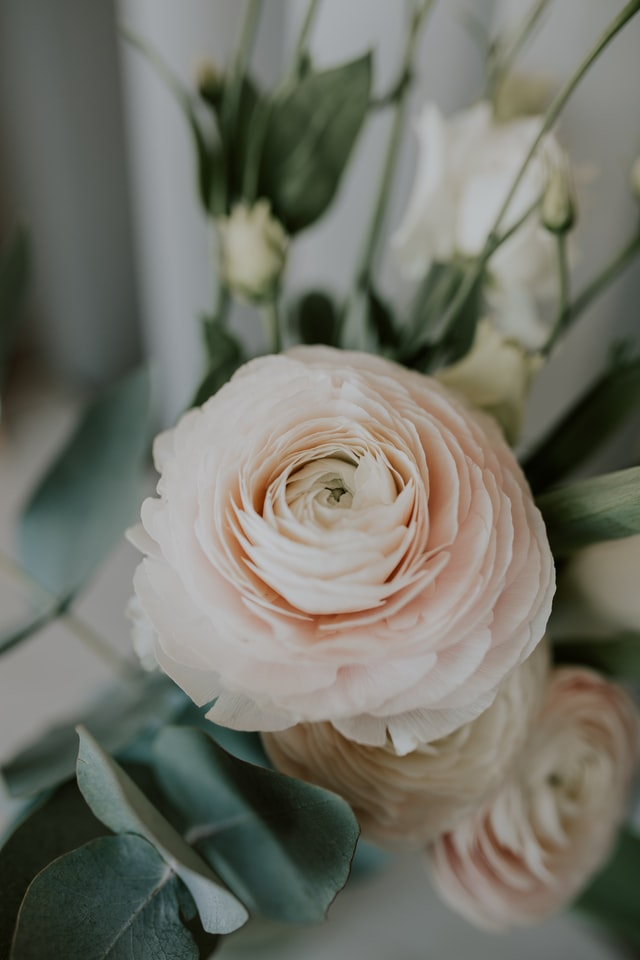

In [7]:
# Find all duplicates
for score, idx1, idx2 in duplicates[0:10]:
    print("\nScore: {:.3f}".format(score))
    print(img_names[idx1])
    display(IPImage(os.path.join(img_names[idx1]), width=200))
    print( img_names[idx2])
    display(IPImage(os.path.join(img_names[idx2]), width=200))


Score: 0.984
photos\ad91jz_dFpc.jpg


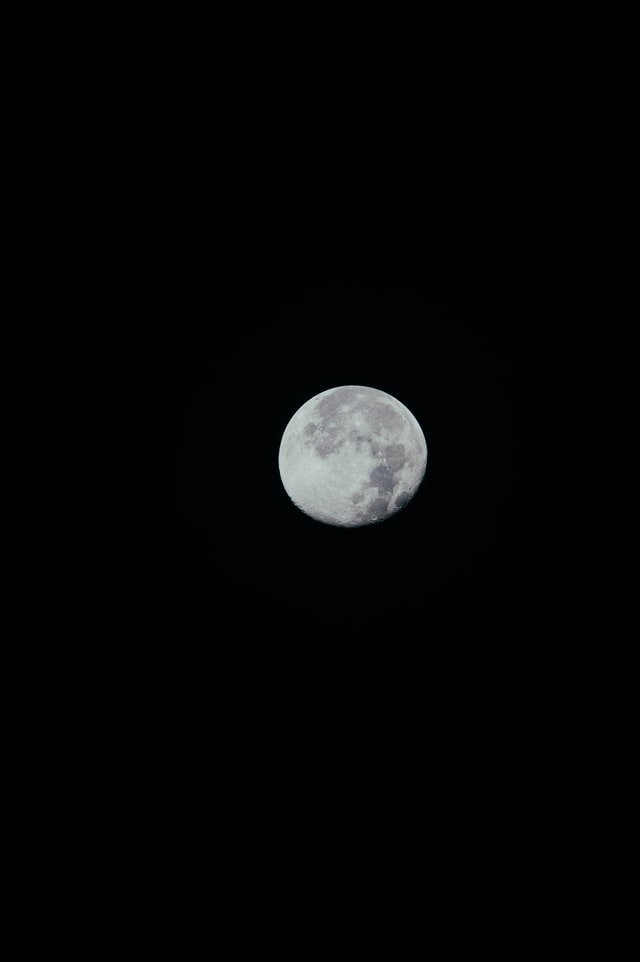

photos\b2Q8xCmcsvk.jpg


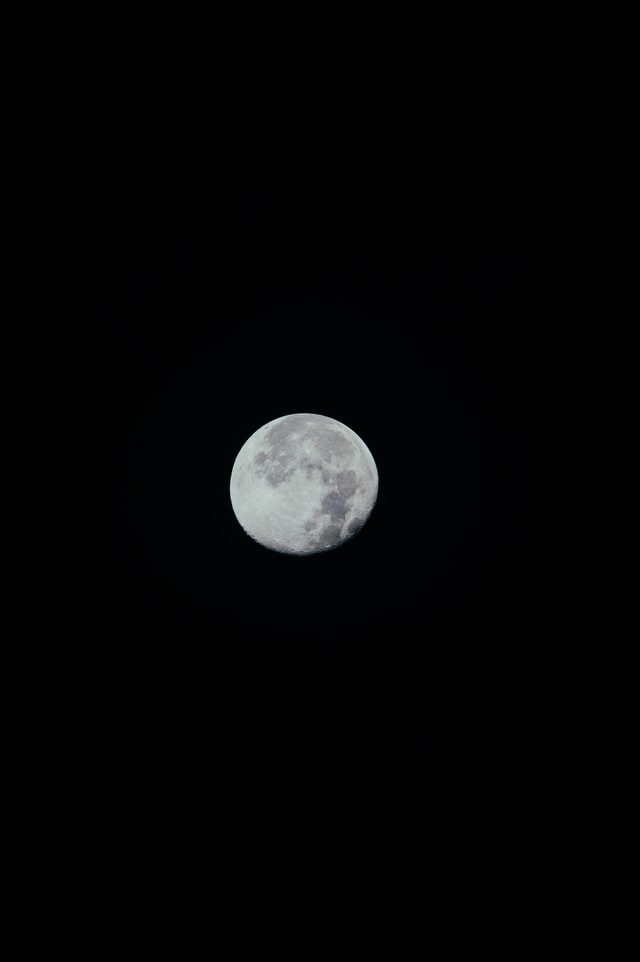


Score: 0.983
photos\3tHeNvZkdco.jpg


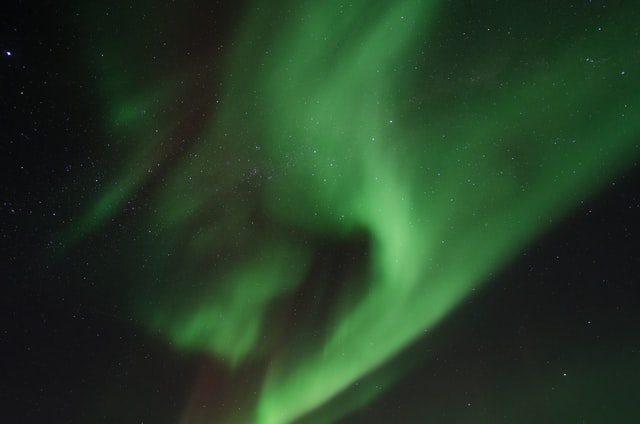

photos\4aphqBYyZsA.jpg


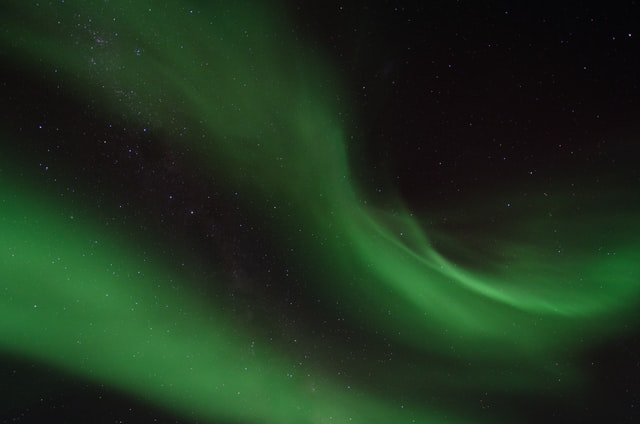


Score: 0.980
photos\7wFSaj-k-uQ.jpg


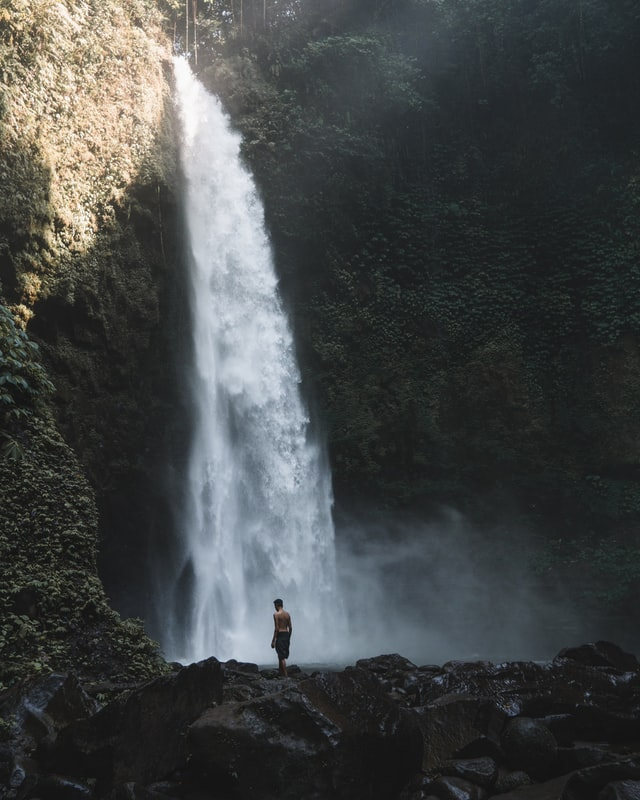

photos\_oRt0kO6W-s.jpg


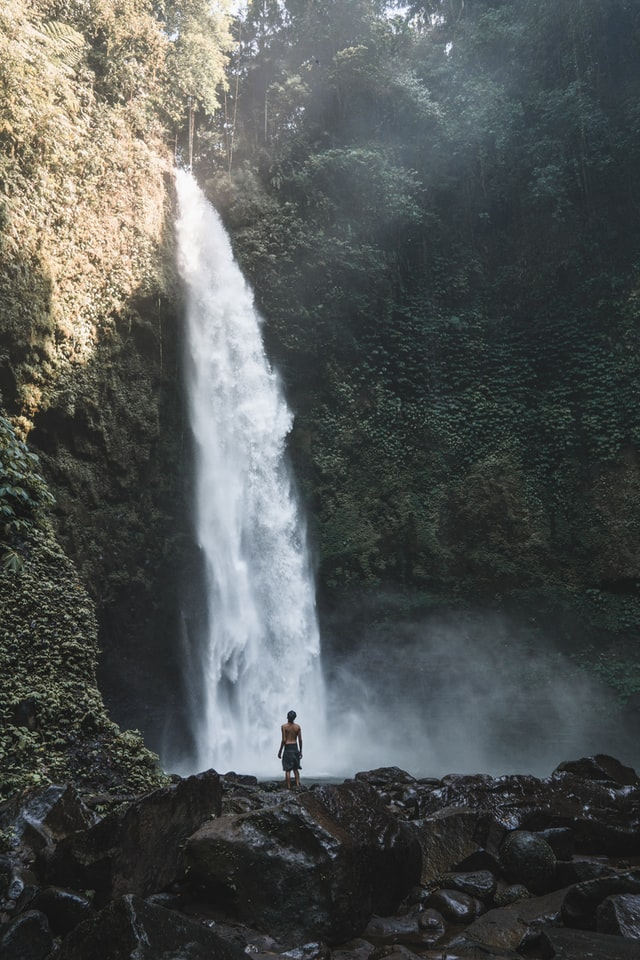


Score: 0.980
photos\1T6IoZ9ZmQ8.jpg


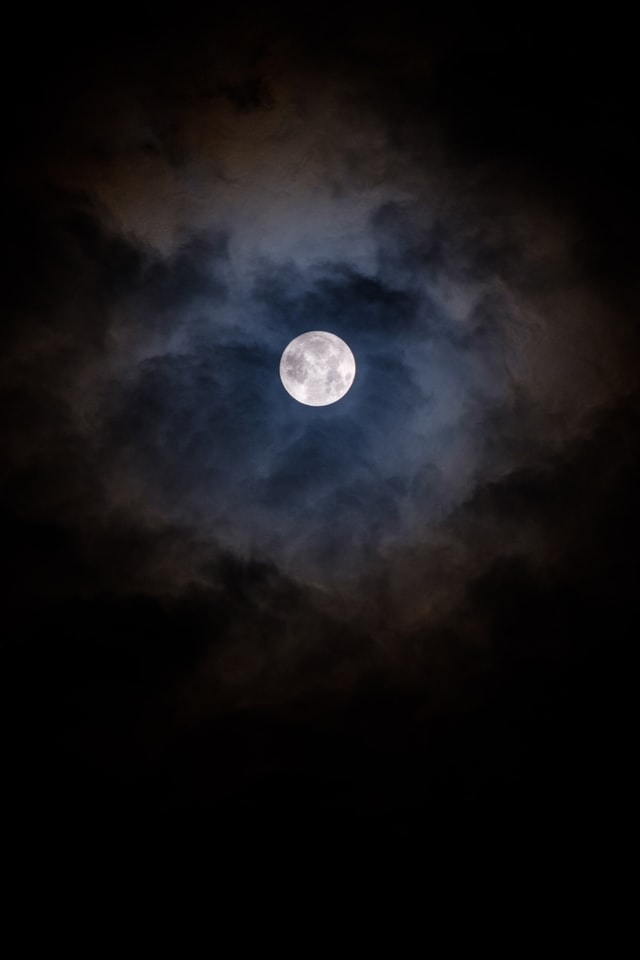

photos\5D_xJ1MJg6A.jpg


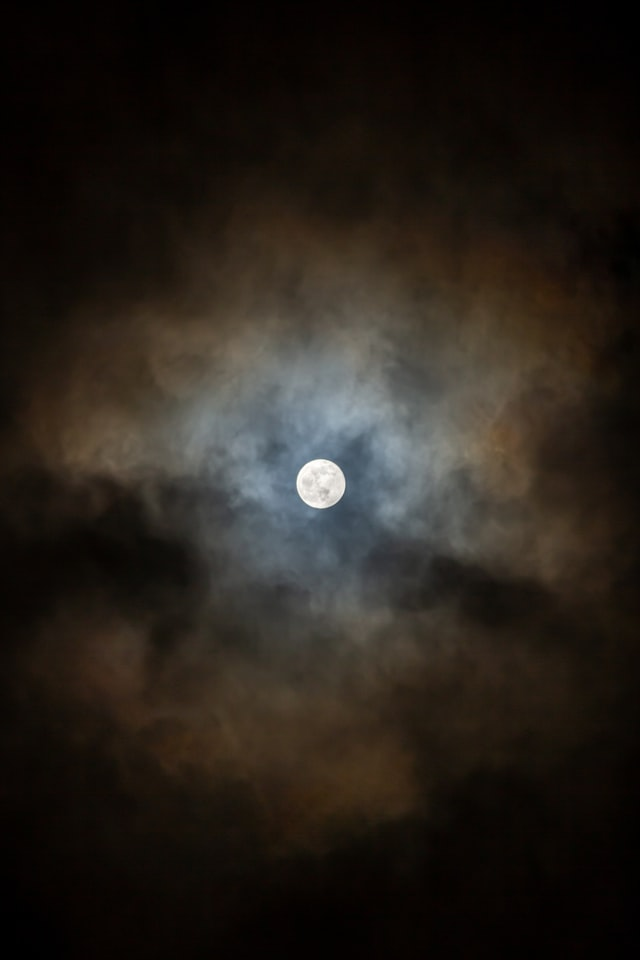


Score: 0.979
photos\9zhsq3o1k60.jpg


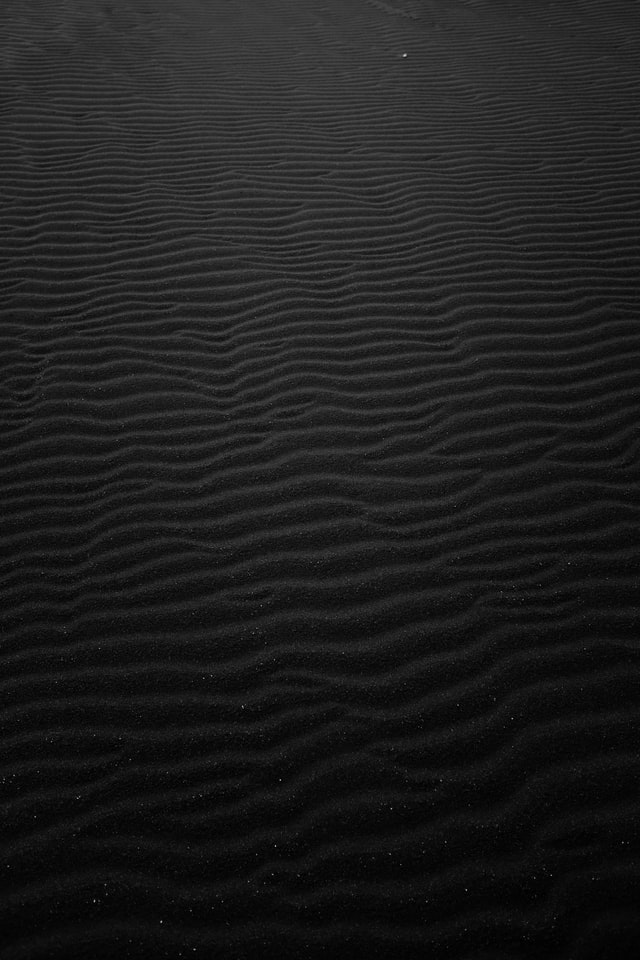

photos\AswhiuXqHLw.jpg


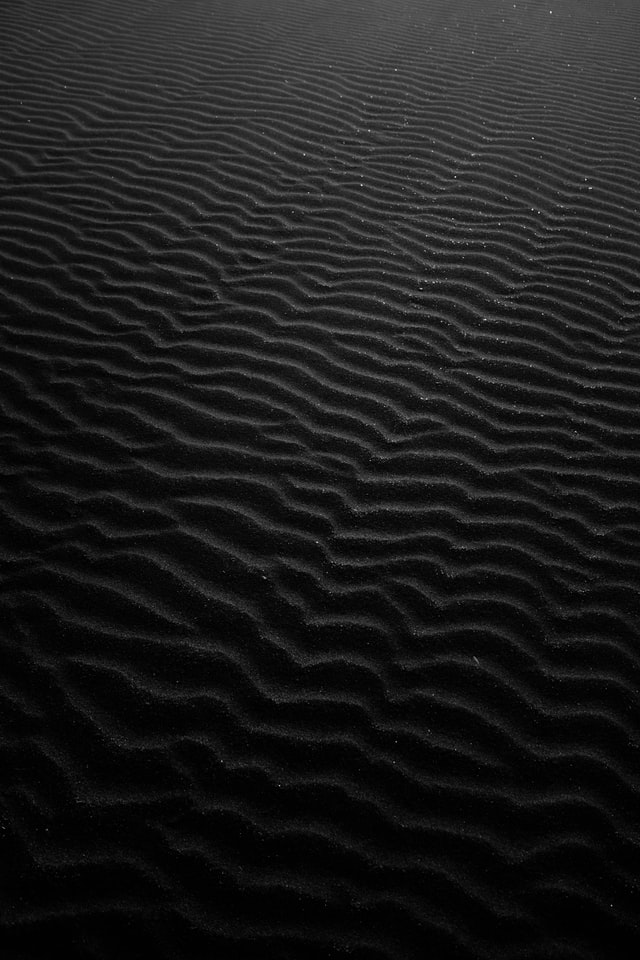


Score: 0.977
photos\1Crk-7TX198.jpg


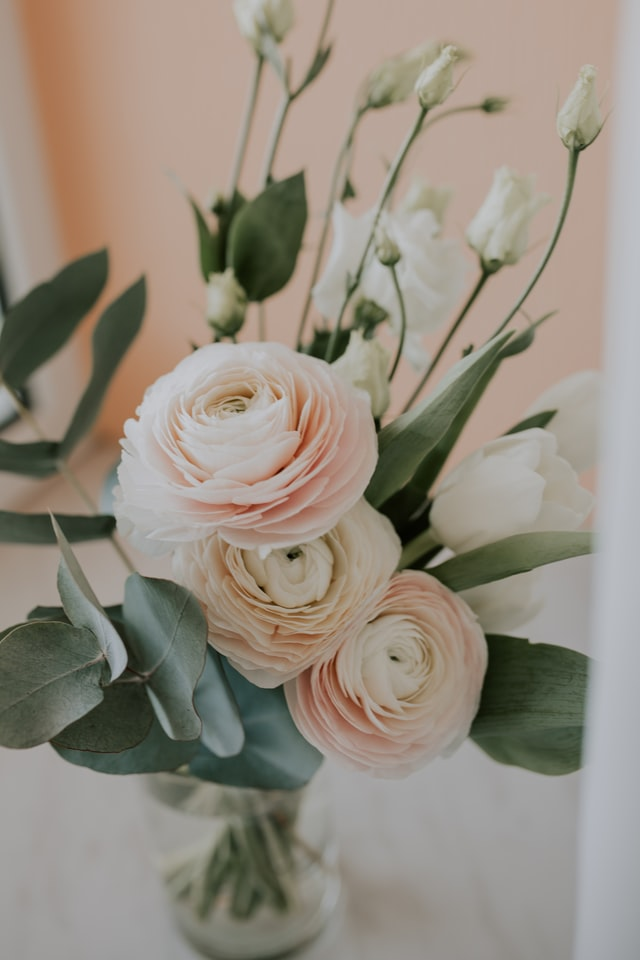

photos\AV63YZlP9ao.jpg


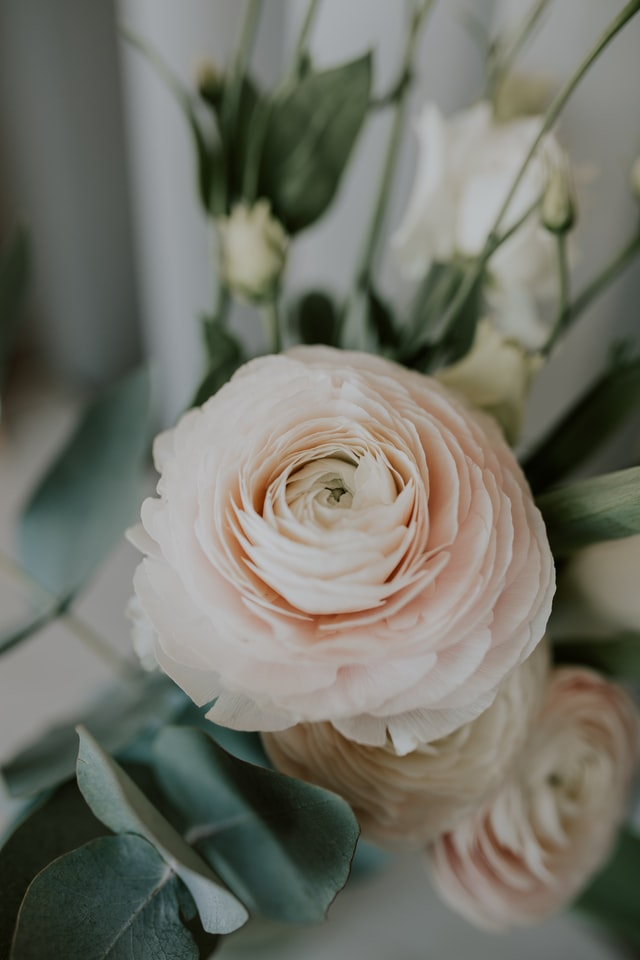


Score: 0.977
photos\8fJg5TR4R-w.jpg


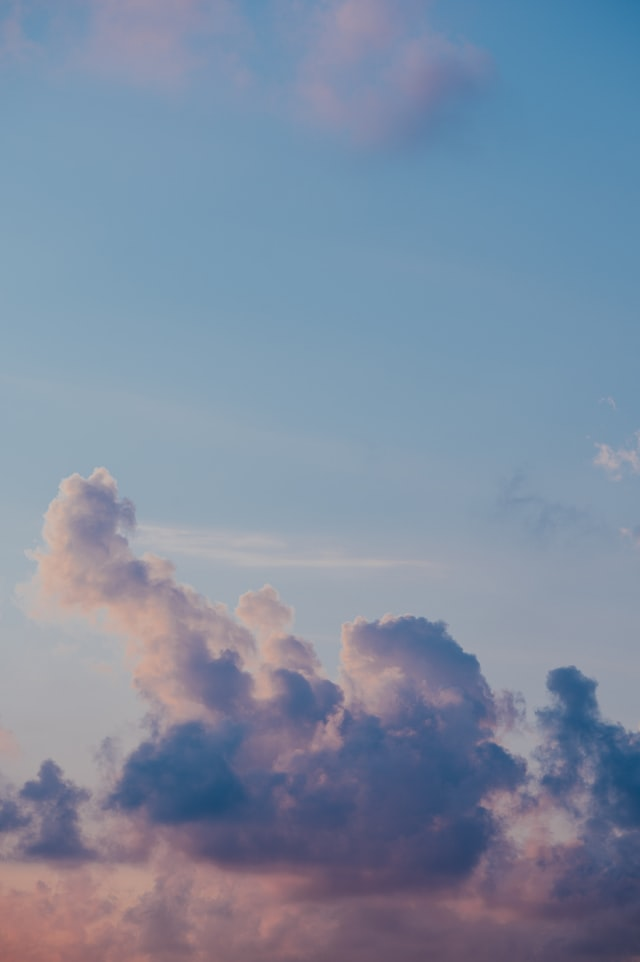

photos\8LNvEQ00pT0.jpg


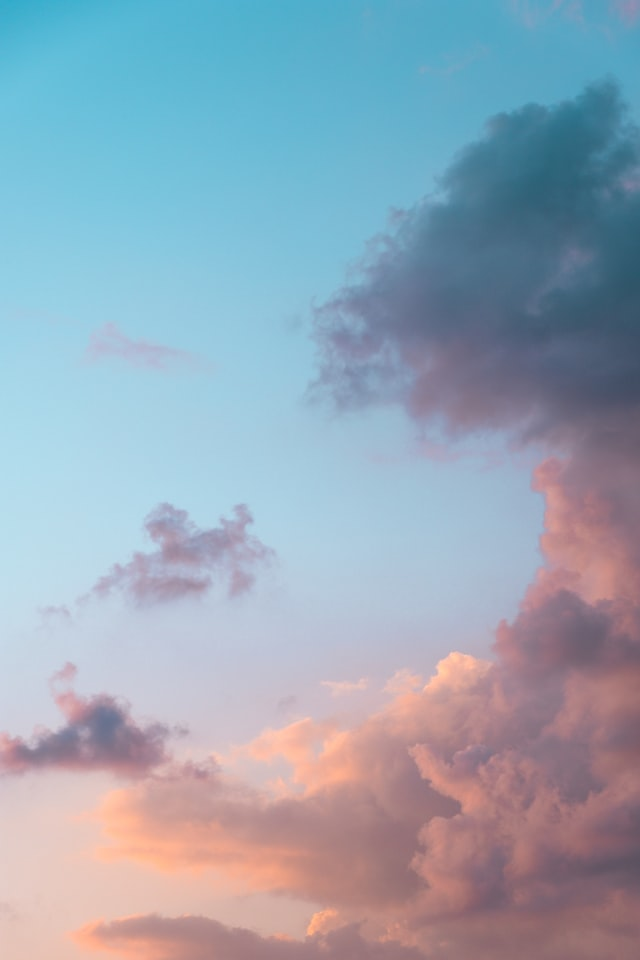


Score: 0.977
photos\1z3P4ZI1A6o.jpg


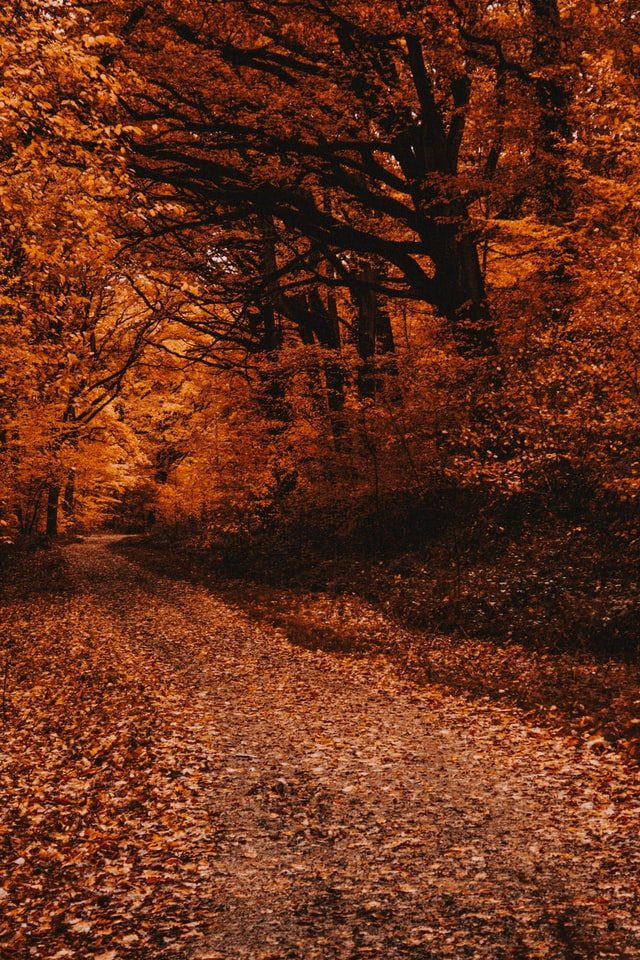

photos\3ACpcGixh2k.jpg


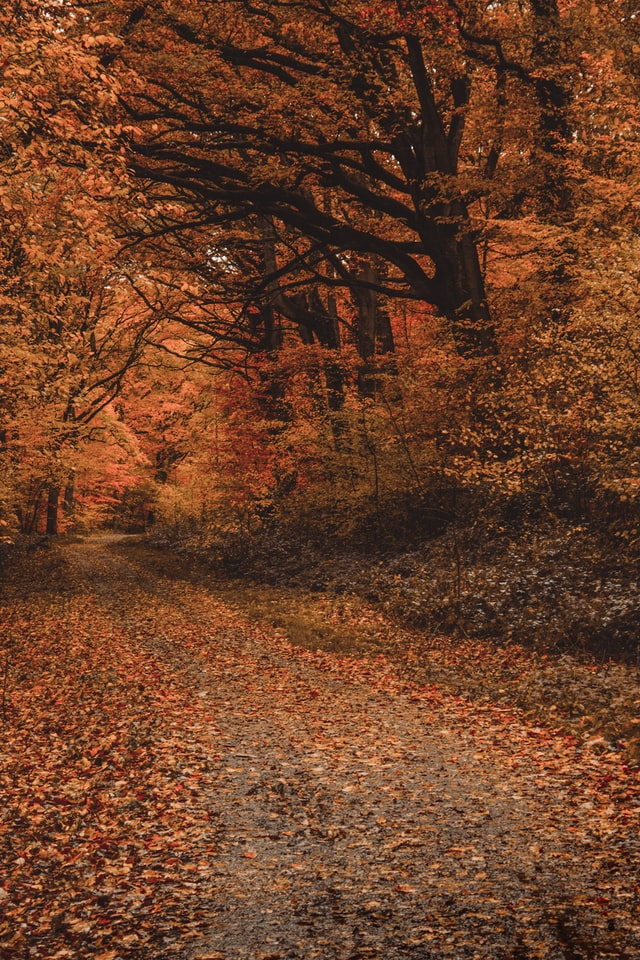


Score: 0.977
photos\4dKe5pHNahs.jpg


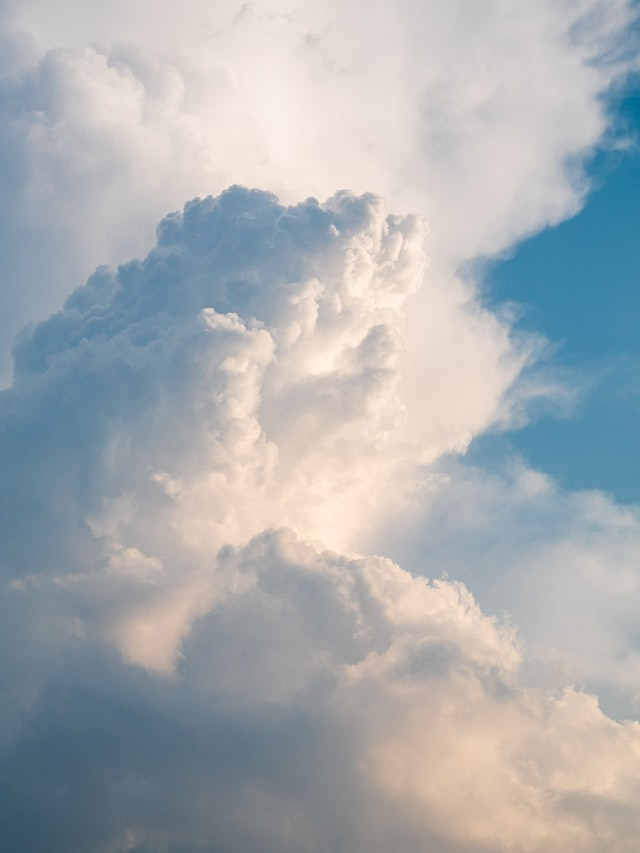

photos\9duHH_ZLCs4.jpg


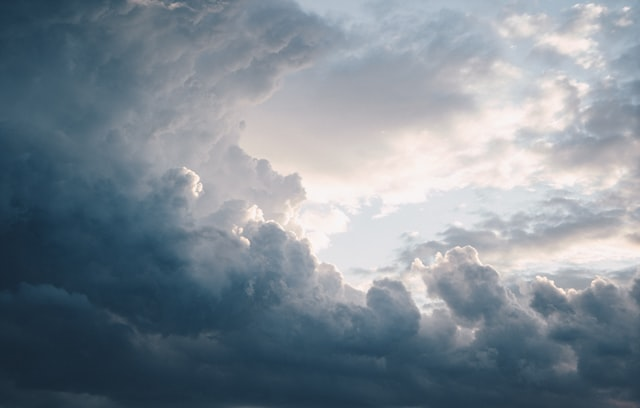


Score: 0.976
photos\18Ln684OEj4.jpg


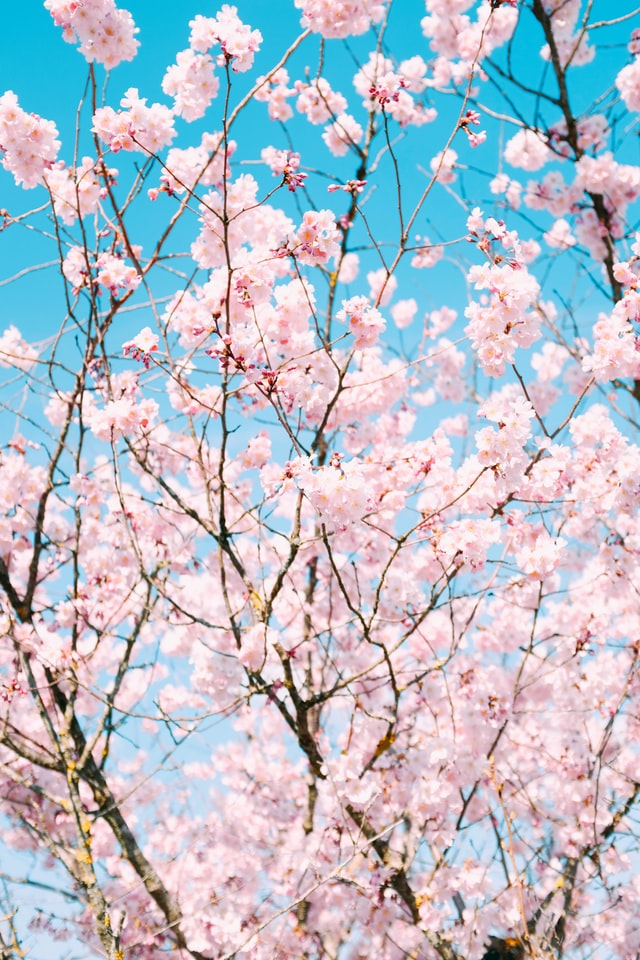

photos\6Bi84aVKUVo.jpg


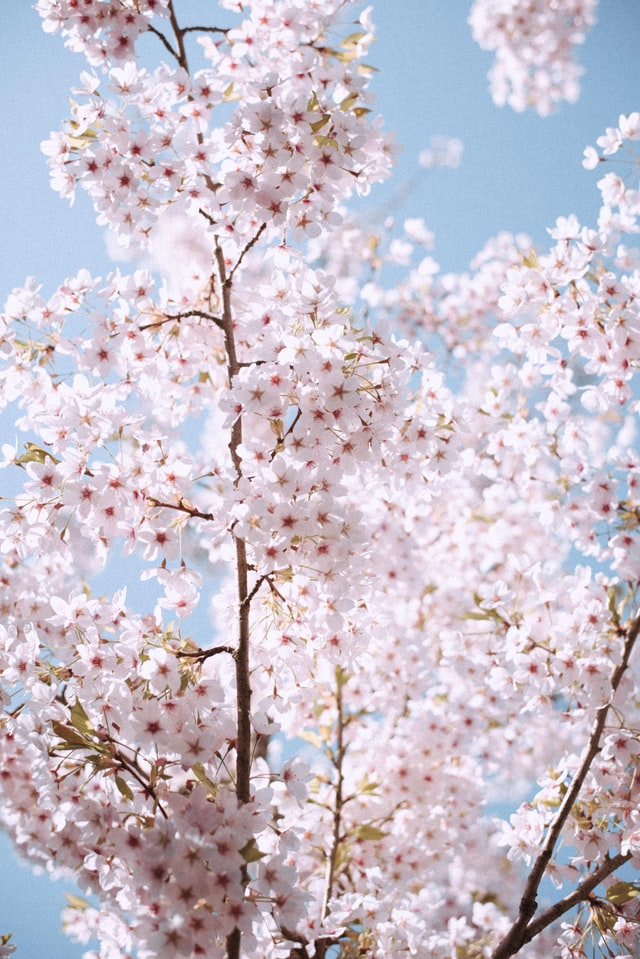

In [8]:
# Find near duplicates only
threshold = 0.99
near_duplicates = [entry for entry in duplicates if entry[0] < threshold]

for score, idx1, idx2 in near_duplicates[0:10]:
    print("\nScore: {:.3f}".format(score))
    print(img_names[idx1])
    display(IPImage(os.path.join(img_names[idx1]), width=200))
    print(img_names[idx2])
    display(IPImage(os.path.join(img_names[idx2]), width=200))

In [9]:
img_emb.shape

torch.Size([5200, 512])

## Similar image retrieval

In [10]:
import heapq

In [46]:
img_test_idx = 22

In [47]:
img_test_names = list(glob.glob('photos/test/*.jpg'))
img_test = img_test_names[img_test_idx]
img_test_emb = model.encode(Image.open(img_test))

In [48]:
def get_closests(img_emb, img_test_emb, k=5):
    if len(img_emb) < k:
        return 
    
    closests = [(util.cos_sim(img_emb[i], img_test_emb), i) for i in range(k)]
    heapq.heapify(closests)

    for i in range(len(img_emb)):
        sim_score = util.cos_sim(img_emb[i], img_test_emb)
        if sim_score > closests[0][0]:
            heapq.heapreplace(closests, (sim_score, i))
    return closests

In [49]:
%%time
closests = get_closests(img_emb, img_test_emb)

Wall time: 844 ms


In [50]:
closests.sort(reverse=True)

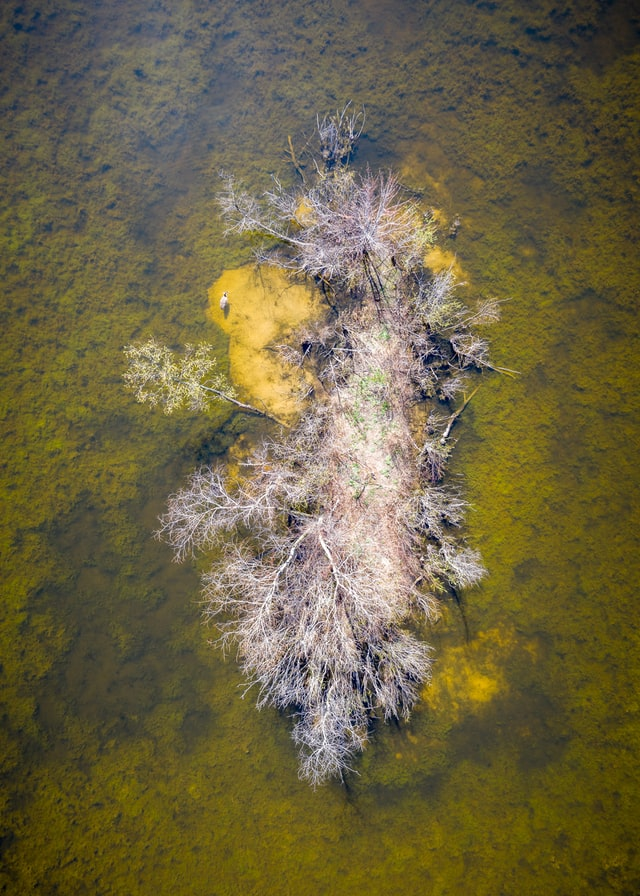

In [51]:
display(IPImage(img_test, width=200))


Score: 0.840


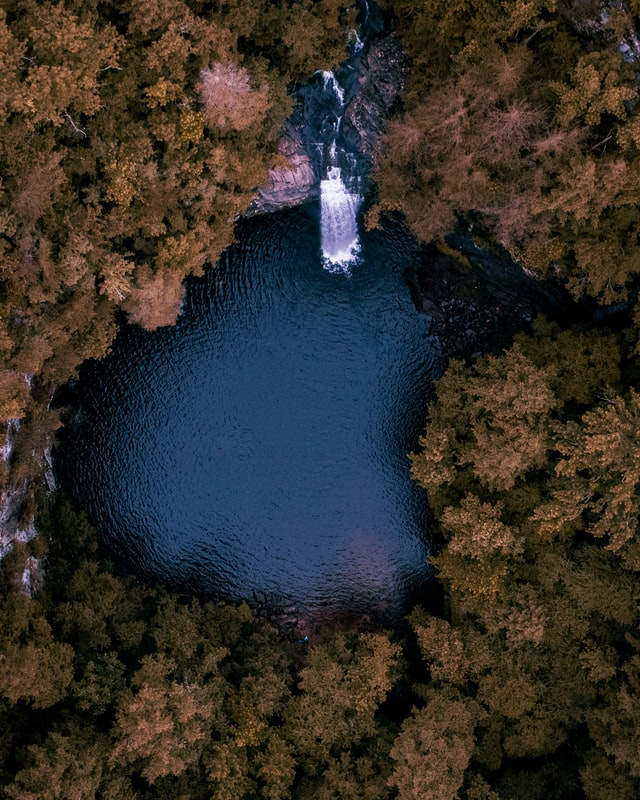


Score: 0.834


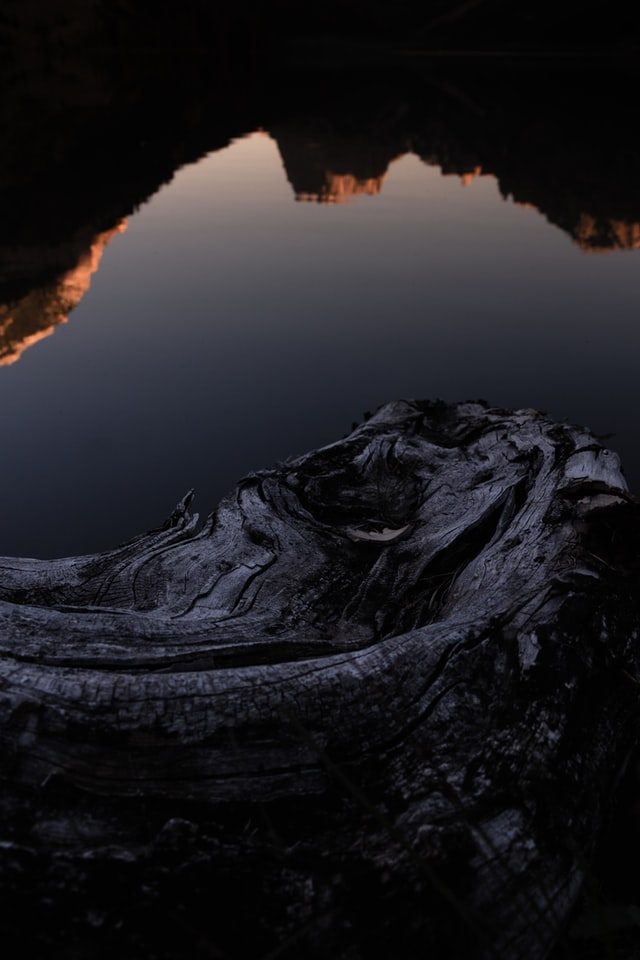


Score: 0.815


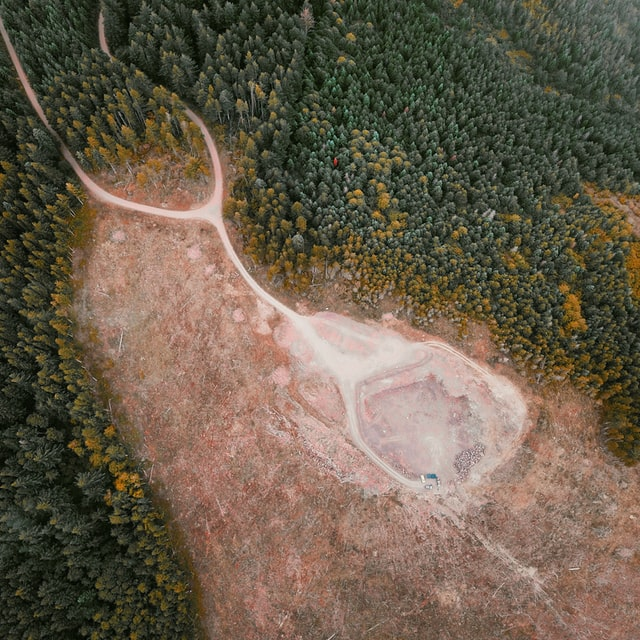


Score: 0.811


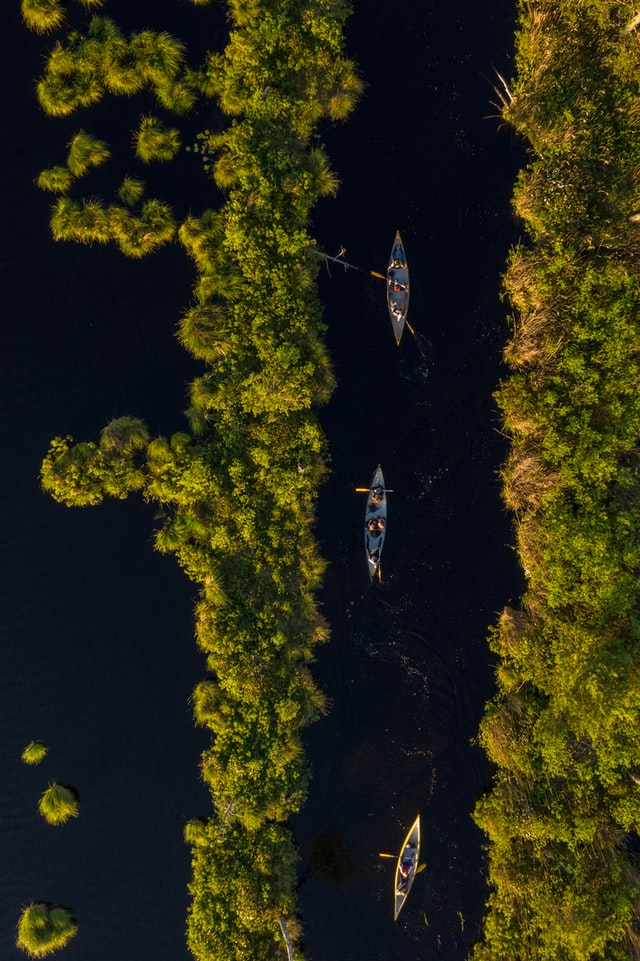


Score: 0.810


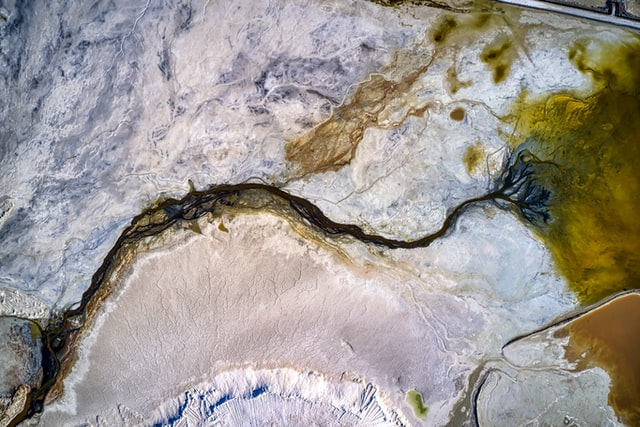

In [52]:
for sim_score, idx in closests:
    print("\nScore: {:.3f}".format(float(sim_score)))
    display(IPImage(img_names[idx], width=200))